<a href="https://colab.research.google.com/github/zezeko/tf_specialization/blob/master/nlp/Course_3_Week_3_Lesson_1c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Layer GRU

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

%tensorflow_version 2.x
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0-rc1


In [0]:
# If the tf.__version__ is 1.x, please run this cell
#!pip install tensorflow==2.0.0-beta0

In [0]:
#import tensorflow_datasets as tfds
#import tensorflow as tf
#print(tf.__version__)

In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [0]:
tokenizer = info.features['text'].encoder

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 29s 73ms/step - loss: 0.4592 - accuracy: 0.7735 - val_loss: 0.3141 - val_accuracy: 0.8763
Epoch 2/10
391/391 [==============================] - 16s 40ms/step - loss: 0.2249 - accuracy: 0.9166 - val_loss: 0.2988 - val_accuracy: 0.8789
Epoch 3/10
391/391 [==============================] - 15s 39ms/step - loss: 0.1702 - accuracy: 0.9383 - val_loss: 0.3337 - val_accuracy: 0.8728
Epoch 4/10
391/391 [==============================] - 15s 38ms/step - loss: 0.1402 - accuracy: 0.9501 - val_loss: 0.3583 - val_accuracy: 0.8704
Epoch 5/10
391/391 [==============================] - 15s 39ms/step - loss: 0.1099 - accuracy: 0.9619 - val_loss: 0.4208 - val_accuracy: 0.8656
Epoch 6/10
391/391 [==============================] - 15s 38ms/step - loss: 0.0870 - accuracy: 0.9722 - val_loss: 0.4948 - val_accuracy: 0.8621
Epoch 7/10
391/391 [==============================] - 14s 37ms/step - loss: 0.0710 - accuracy: 0.9769 - val_loss: 0.5543 - val_accuracy:

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

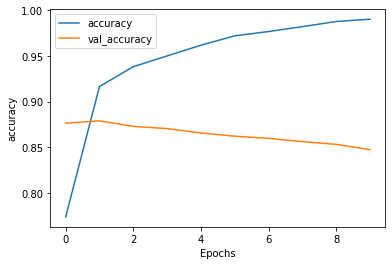

In [10]:
plot_graphs(history, 'accuracy')

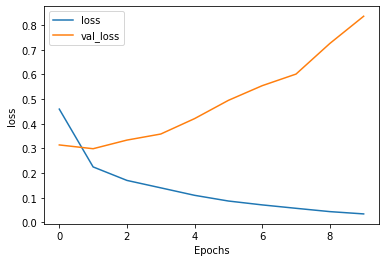

In [11]:
plot_graphs(history, 'loss')